The maximum frequency for reconstruction is 800.0 Hz.
[4.         4.76536686 5.41421356 5.84775907 6.         5.84775907
 5.41421356 4.76536686]


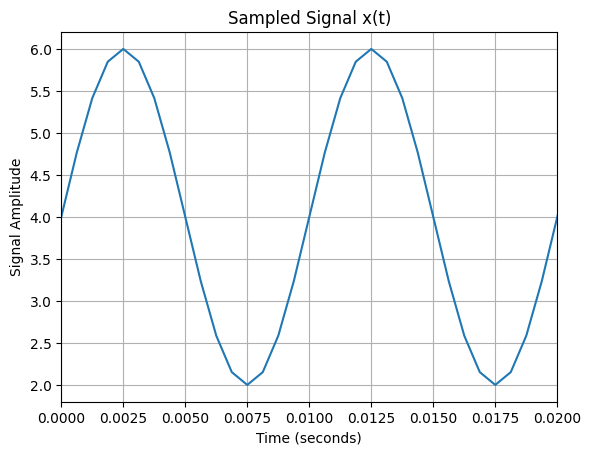

In [ ]:
# Assignment 1 - Signal Sampling
import numpy as np
import matplotlib.pyplot as plt

# Sampling period and frequency
fs = 1600  # Sampling frequency in Hz
T = 1 / fs  # Sampling period
n = np.arange(0, 2 / T + 1)  # Sample indices
t = n * T  # Sampled time array

# Maximum frequency for reconstruction
max_frequency = fs / 2  # Nyquist frequency
print(f"The maximum frequency for reconstruction is {max_frequency} Hz.")

# Define the signal
x = 4 + 2 * np.sin(2 * np.pi * 100 * t)

# Print a portion of the signal
print(x[:8])  # First 8 samples
# Plot the sampled signal
plt.plot(t, x)
plt.xlabel('Time (seconds)')
plt.ylabel('Signal Amplitude')
plt.title('Sampled Signal x(t)')
plt.xlim([0, 0.02])  # Limit to the first 20ms
plt.grid(True)
plt.show()

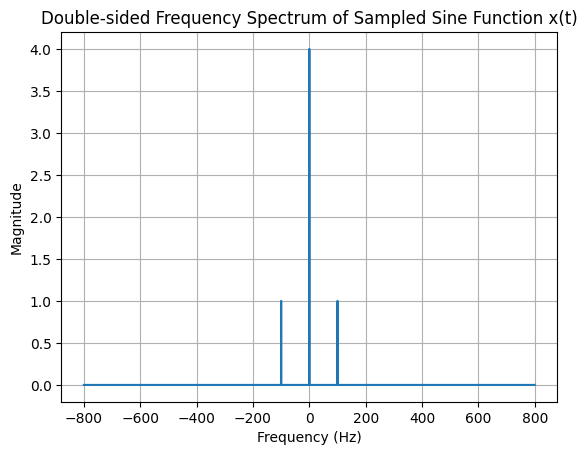

In [9]:

#Assignment 2 - Frequency Spectrum
# Compute the FFT
N = len(x)  # Number of samples
X = np.fft.fft(x) / N  # Normalize the FFT
frequencies = np.fft.fftfreq(N, d=T)  # Frequency array (in Hz)

# Shift the FFT for a double-sided spectrum
X_shifted = np.fft.fftshift(X)
frequencies_shifted = np.fft.fftshift(frequencies)

# Plot the double-sided frequency spectrum
plt.plot(frequencies_shifted, np.abs(X_shifted))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Double-sided Frequency Spectrum of Sampled Sine Function x(t)')
plt.grid(True)
plt.show()

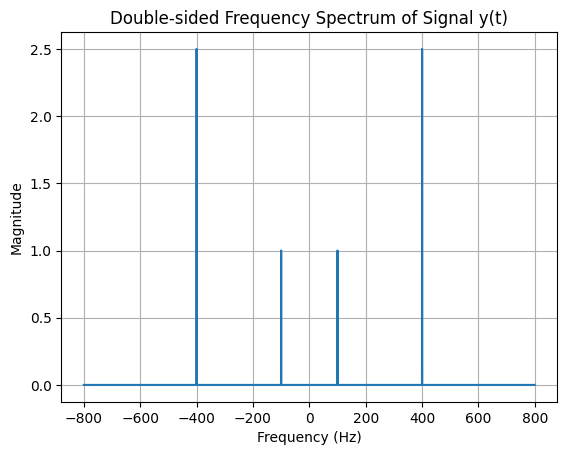

In [11]:
# Define the signal
y = 2 * np.sin(2 * np.pi * 100 * t) + 5 * np.cos(2 * np.pi * 1200 * t)

# Compute the FFT
N = len(y)  # Number of samples
Y = np.fft.fft(y) / N  # Normalize the FFT
frequencies = np.fft.fftfreq(N, d=T)  # Frequency array (in Hz)

# Shift the FFT for a double-sided spectrum
Y_shifted = np.fft.fftshift(Y)
frequencies_shifted = np.fft.fftshift(frequencies)

# Plot the double-sided frequency spectrum
plt.plot(frequencies_shifted, np.abs(Y_shifted))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Double-sided Frequency Spectrum of Signal y(t)')
plt.grid(True)
plt.show()

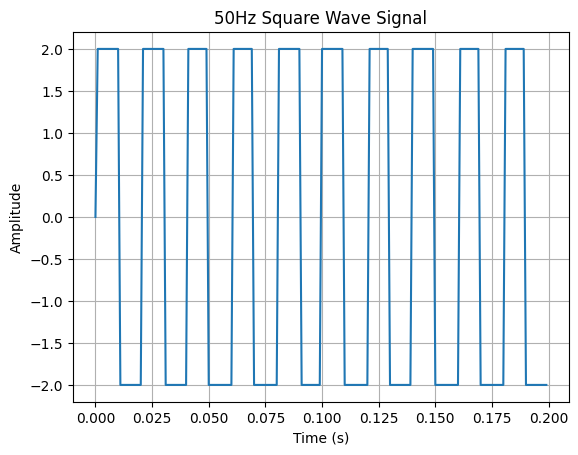

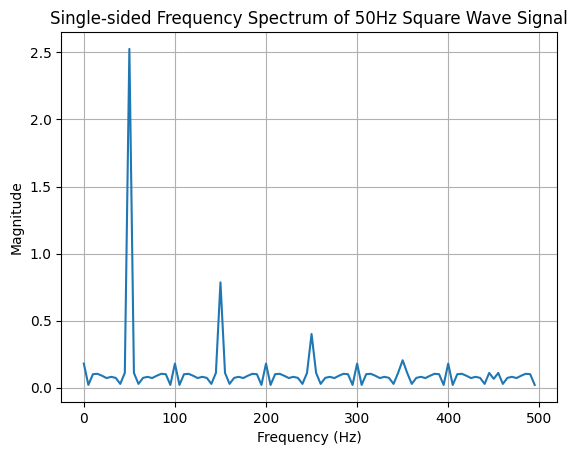

In [12]:
# Define parameters
f_square = 50  # Signal frequency in Hz
fs_square = 1000  # Sampling frequency in Hz
duration_square = 0.2  # Signal duration in seconds

# Generate the square wave signal
t_square = np.linspace(0, duration_square, int(duration_square * fs_square), endpoint=False)
x_square = np.sign(np.sin(2 * np.pi * f_square * t_square)) * 2  # Square wave with amplitude ±2V

# Plot the time-domain signal
plt.plot(t_square, x_square)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('50Hz Square Wave Signal')
plt.grid(True)
plt.show()

# Compute the frequency spectrum
N = len(x_square)  # Number of samples
X_square = np.fft.fft(x_square) / N  # Normalize the FFT
frequencies = np.fft.fftfreq(N, d=1/fs_square)  # Frequency array

# Take the single-sided spectrum
X_square_single = X_square[:N//2]  # First half of the FFT result
frequencies_single = frequencies[:N//2]  # Positive frequencies
magnitude_single = 2 * np.abs(X_square_single)  # Double the magnitude (except DC)

# Plot the single-sided frequency spectrum
plt.plot(frequencies_single, magnitude_single)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Single-sided Frequency Spectrum of 50Hz Square Wave Signal')
plt.grid(True)
plt.show()